## Executed commands
1. cd $SCRATCH
2. module load cuda/12.1.1
3. conda create --prefix $SCRATCH/a1 python=3.11 -y
4. conda activate a1/
5. conda install numpy
6. conda install -c conda-forge matplotlib
7. conda install -c conda-forge pandas
8. conda install -c conda-forge jupyter
9. python -m ipykernel install --user --name=a1 --display-name "cuda-a1"


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import json

In [12]:
data_file_path = '/net/pr2/projects/plgrid/plgglscclass/yelp-dataset/yelp_academic_dataset_business.json'

data = []
with open(data_file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None
              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3

In [13]:
df['attributes'] = df['attributes'].apply(lambda x: x if isinstance(x, dict) else {})
df['categories'] = df['categories'].fillna('').apply(lambda x: x.split(', '))
df['hours'] = df['hours'].apply(lambda x: x if isinstance(x, dict) else {})

print(df.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [14]:
print("Average Stars:", df['stars'].mean())
print("Average Review Count:", df['review_count'].mean())

Average Stars: 3.5967235576603303
Average Review Count: 44.86656113232144


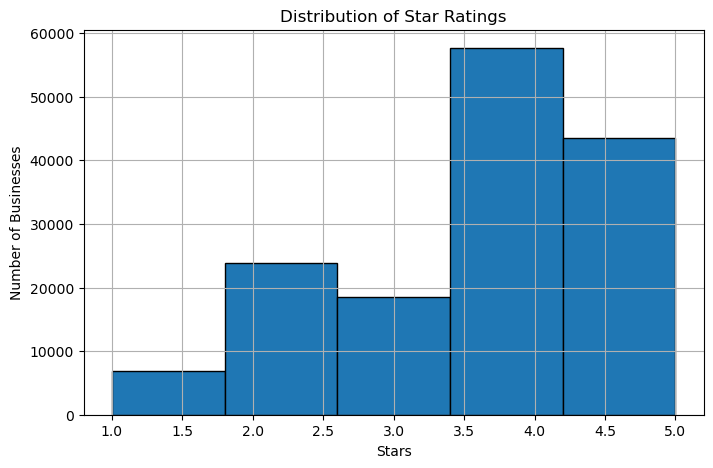

In [15]:
# Plot distribution of star ratings
plt.figure(figsize=(8, 5))
df['stars'].hist(bins=5, edgecolor='black')
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Star Ratings')
plt.show()

In [22]:
# Most reviewed businesses
top_reviewed = df.sort_values(by='review_count', ascending=False).head(10)
print("Top Reviewed Businesses:\n", top_reviewed[['name', 'stars', 'review_count']])

Top Reviewed Businesses:
                                       name  stars  review_count
113731                   Acme Oyster House    4.0          7568
112552                        Oceana Grill    4.0          7400
91757   Hattie B’s Hot Chicken - Nashville    4.5          6093
143157             Reading Terminal Market    4.5          5721
147081          Ruby Slipper - New Orleans    4.5          5193
100024                 Mother's Restaurant    3.5          5185
31033                          Royal House    4.0          5070
31332                   Commander's Palace    4.5          4876
4497                                  Luke    4.0          4554
97331                               Cochon    4.0          4421


In [21]:
best_rated = df[df['review_count'] >= 10].sort_values(by=['stars', 'review_count'], ascending=[False, False]).head(10)
print("Best Rated Businesses:\n", best_rated[['name', 'stars', 'review_count']])

Best Rated Businesses:
                                       name  stars  review_count
12307                      Blues City Deli    5.0           991
134154                    Carlillos Cocina    5.0           799
25015                   Free Tours By Foot    5.0           769
16555                             Tumerico    5.0           705
70650                                 Yats    5.0           623
119671     Nelson's Green Brier Distillery    5.0           545
125597             Smiling With Hope Pizza    5.0           526
144833  Barracuda Deli Cafe St. Pete Beach    5.0           521
104287                   SUGARED + BRONZED    5.0           513
7930                           Cafe Soleil    5.0           468


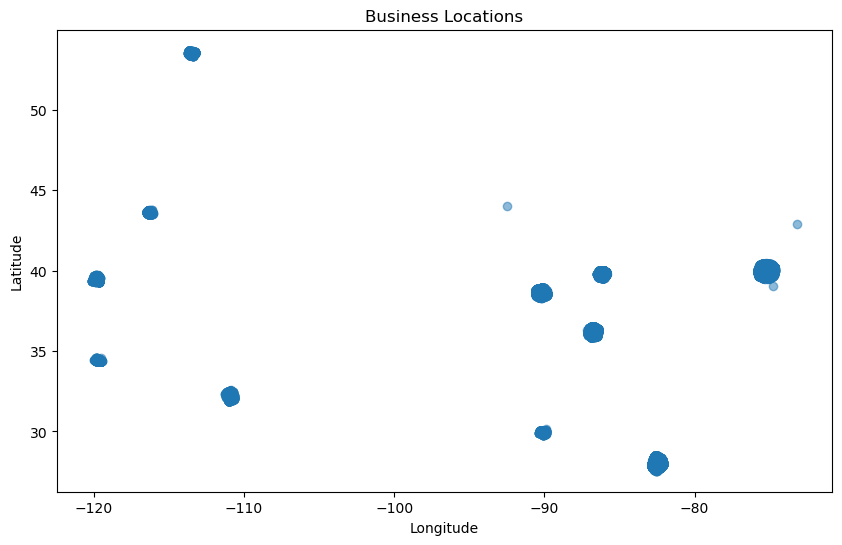

In [17]:
# Geospatial analysis (scatter plot of business locations)
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Business Locations')
plt.show()

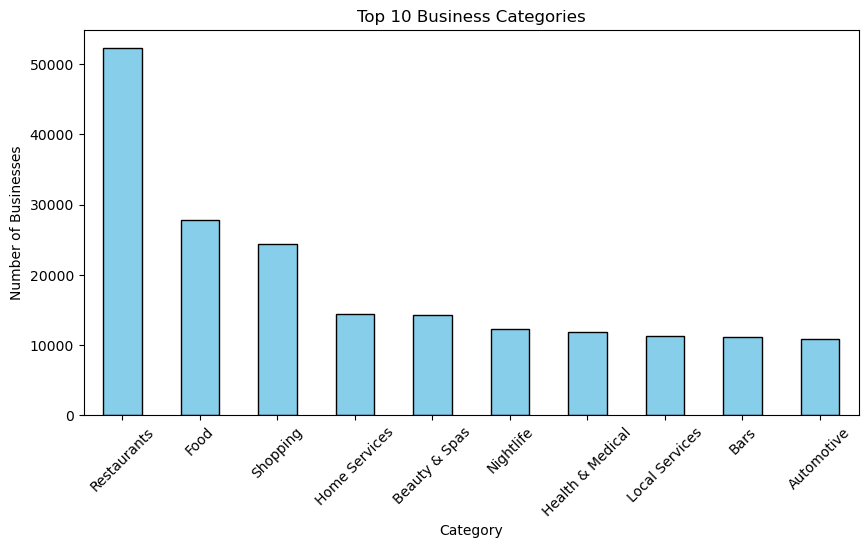

In [20]:
# Category analysis
categories = df.explode('categories')['categories'].value_counts().head(10)
categories.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Business Categories')
plt.xticks(rotation=45)
plt.show()